In [1]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn


import sys
sys.path.append("..")
from src.load_data import load_CIFAR10
from src.preprocess import transform_CIFAR10
from src.plotting import imshow
from model.ANN import ANN
from src.train_predict import train, test_classification


In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
batch_size = 4

train_set, test_set = load_CIFAR10(transform_CIFAR10())
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size = batch_size, \
                                               shuffle = True, num_workers = 0)

In [4]:
classes = train_set.classes


Training

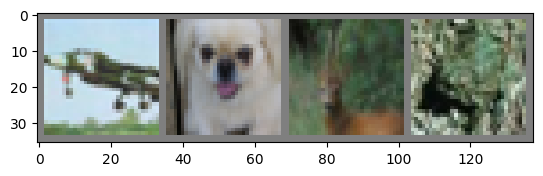

<generator object <genexpr> at 0x000002094EA3E420>


In [5]:
dataiter = iter(train_dataloader)
img, labels = next(dataiter)

imshow(torchvision.utils.make_grid(img))
print(" ".join(f'{classes[labels[j]]}') for j in range(batch_size))


In [6]:
img.shape

torch.Size([4, 3, 32, 32])

In [7]:
model = ANN(input_feature=3072, output_feature= len(classes))

model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


In [8]:
train(num_loops= 10, criterion= criterion, optim= optimizer, model= model, \
      train_dataloader= train_dataloader, device= device, path = "ANN_cifar10.pth")

[1,  2000] loss: 1.947
[1,  4000] loss: 1.850
[1,  6000] loss: 1.817
[1,  8000] loss: 1.803
[1, 10000] loss: 1.779
[1, 12000] loss: 1.792
[2,  2000] loss: 1.769
[2,  4000] loss: 1.776
[2,  6000] loss: 1.772
[2,  8000] loss: 1.752
[2, 10000] loss: 1.765
[2, 12000] loss: 1.755
[3,  2000] loss: 1.738
[3,  4000] loss: 1.748
[3,  6000] loss: 1.735
[3,  8000] loss: 1.748
[3, 10000] loss: 1.746
[3, 12000] loss: 1.758
[4,  2000] loss: 1.734
[4,  4000] loss: 1.726
[4,  6000] loss: 1.717
[4,  8000] loss: 1.749
[4, 10000] loss: 1.737
[4, 12000] loss: 1.745
[5,  2000] loss: 1.696
[5,  4000] loss: 1.737
[5,  6000] loss: 1.732
[5,  8000] loss: 1.715
[5, 10000] loss: 1.746
[5, 12000] loss: 1.744
[6,  2000] loss: 1.715
[6,  4000] loss: 1.735
[6,  6000] loss: 1.714
[6,  8000] loss: 1.717
[6, 10000] loss: 1.720
[6, 12000] loss: 1.733
[7,  2000] loss: 1.719
[7,  4000] loss: 1.713
[7,  6000] loss: 1.726
[7,  8000] loss: 1.728
[7, 10000] loss: 1.707
[7, 12000] loss: 1.710
[8,  2000] loss: 1.722
[8,  4000] 

Testing

In [9]:
model_pred = ANN(input_feature=3072, output_feature= len(classes))
model_pred.load_state_dict(torch.load("ANN_cifar10.pth"))

<All keys matched successfully>

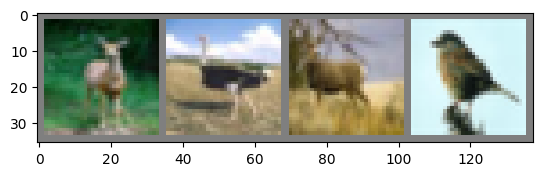

Ground truth:  deer bird deer bird
Predict:  deer airplane horse bird


In [10]:
dataiter = iter(test_dataloader)
img, labels = next(dataiter)
_, predicts = torch.max(model_pred(img), 1)


imshow(torchvision.utils.make_grid(img))
print("Ground truth: ", " ".join(f"{classes[labels[j]]}" for j in range(batch_size)))
print("Predict: ", " ".join(f"{classes[predicts[j]]}" for j in range(batch_size)))


In [11]:
test_classification(model= model_pred, test_dataloader= test_dataloader, \
                    device= device, classes= classes)

Accuracy of the network in the test dataset: 39 %
Accuracy for class airplane: 48.4
Accuracy for class automobile: 48.4
Accuracy for class bird: 20.3
Accuracy for class cat: 30.8
Accuracy for class deer: 24.7
Accuracy for class dog: 29.0
Accuracy for class frog: 49.5
Accuracy for class horse: 46.9
Accuracy for class ship: 57.3
Accuracy for class truck: 43.0
